In [3]:
import pandas as pd
df = pd.read_excel("Data/최종 프로젝트/FISIS_MultipleTable_200003-202503.xlsx")
df

,회사명,회사코드,보고서명,보고서코드,항목,factor_id,단위,2025년03월,2024년12월,2024년09월,...,2010년06월,2010년03월,2009년12월,2009년09월,2009년06월,2009년03월,2008년12월,2008년09월,2008년06월,2008년03월
0,국민은행,10927,부문별 손익(이자부문),SDSA029V,이자순수익:당분기,F000001878,백만원,2479037,2470193,2405710,...,1689137.0,1729140.0,1674064.0,1434488.0,1405897.0,1706155.0,2005226.0,1764927.0,1739086.0,1721311.0
1,국민은행,10927,부문별 손익(이자부문),SDSA029V,이자수익:당분기,F000001879,백만원,5254265,5439757,5468664,...,3442931.0,3485946.0,3507324.0,3369652.0,3468247.0,4043583.0,4607898.0,4155766.0,3961674.0,3838568.0
2,국민은행,10927,부문별 손익(이자부문),SDSA029V,이자수익_예치금이자:당분기,F000001880,백만원,50906,52583,48843,...,2918.0,3261.0,3050.0,2247.0,1522.0,4775.0,95469.0,2158.0,768.0,692.0
3,국민은행,10927,부문별 손익(이자부문),SDSA029V,이자수익_유가증권이자:당분기,F000001881,백만원,785825,813499,786982,...,379898.0,389940.0,396809.0,381027.0,375313.0,385536.0,412684.0,396932.0,429848.0,404336.0
4,국민은행,10927,부문별 손익(이자부문),SDSA029V,이자수익_유가증권이자_당기손익-공정가치측정유가증권이자:당분기,F000001882,백만원,142464,154660,126496,...,28418.0,31705.0,29473.0,36450.0,28066.0,29806.0,54710.0,52775.0,62425.0,61055.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,한국씨티은행,10006,부문별 손익(판매비와 관리비),SDSA033V,세금과공과:누계,F000001993,백만원,4916,17199,14667,...,15054.0,8309.0,34168.0,28056.0,19106.0,9690.0,37397.0,29113.0,18701.0,9971.0
836,한국씨티은행,10006,부문별 손익(판매비와 관리비),SDSA033V,광고선전비:누계,F000001994,백만원,206,3161,1996,...,21393.0,11761.0,33381.0,15728.0,8967.0,4016.0,23942.0,15194.0,9059.0,3934.0
837,한국씨티은행,10006,부문별 손익(판매비와 관리비),SDSA033V,연구비:누계,F000001995,백만원,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,한국씨티은행,10006,부문별 손익(판매비와 관리비),SDSA033V,경상개발비:누계,F000001996,백만원,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
df[(df["항목"].str.contains("당분기")) & (df["보고서명"].str.contains("판매비"))]["항목"].unique()

array(['판매비와 관리비:당분기', '급여:당분기', '퇴직급여:당분기', '해고 및 명예퇴직급여:당분기',
       '복리후생비:당분기', '임차료:당분기', '접대비:당분기', '감가상각비:당분기', '무형자산상각비:당분기',
       '세금과공과:당분기', '광고선전비:당분기', '연구비:당분기', '경상개발비:당분기', '기타 판매·관리비:당분기'],
      dtype=object)

In [ ]:
df = df[df["보고서명"] != "부문별 손익(이자부문)"]

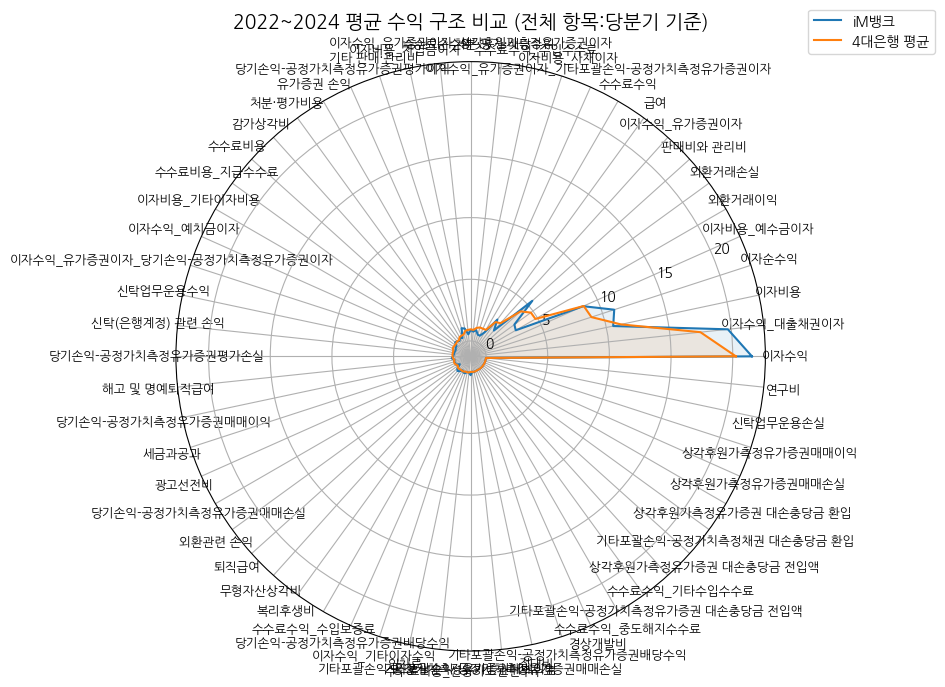

In [80]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 파일 불러오기
xls = pd.ExcelFile("Data/최종 프로젝트/FISIS_MultipleTable_200003-202503.xlsx")
df = xls.parse("복수 통계표 조회결과")

# 2017년 이후 분기 컬럼만 추출
value_cols = [col for col in df.columns if "년" in col and int(col[:4]) >= 2022]

# ':당분기'로 끝나는 항목만 필터링
df = df[df["항목"].str.endswith(":당분기")].copy()

# 평균값 계산
df["값"] = df[value_cols].mean(axis=1)

# 피벗: 회사 x 항목
pivot = df.pivot_table(index="회사명", columns="항목", values="값", aggfunc="sum").fillna(0)

# 전체 기준 상위 20개 항목 선택
top20_cols = pivot.sum().sort_values(ascending=False).index.tolist()
pivot_top20 = pivot[top20_cols]

# 비중 계산
pivot_percent = pivot_top20.div(pivot_top20.sum(axis=1), axis=0) * 100

# 대상 설정
bank_im = "아이엠뱅크"
bank_4 = ["국민은행", "신한은행", "우리은행", "주식회사 하나은행"]

# iM뱅크 + 4대은행 평균 비교용 DF
compare_df = pd.DataFrame()
compare_df["iM뱅크"] = pivot_percent.loc[bank_im]
compare_df["4대은행 평균"] = pivot_percent.loc[bank_4].mean()
compare_df = compare_df.T  # 행: iM뱅크, 4대은행 / 열: 항목

# 레이블: ':당분기' 제거하여 간결하게
labels = [col.replace(":당분기", "") for col in compare_df.columns.tolist()]

# 레이더 차트 시각화
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
for bank in compare_df.index:
    values = compare_df.loc[bank].tolist()
    values += values[:1]
    ax.plot(angles, values, label=bank)
    ax.fill(angles, values, alpha=0.1)

ax.set_title("2022~2024 평균 수익 구조 비교 (전체 항목:당분기 기준)", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

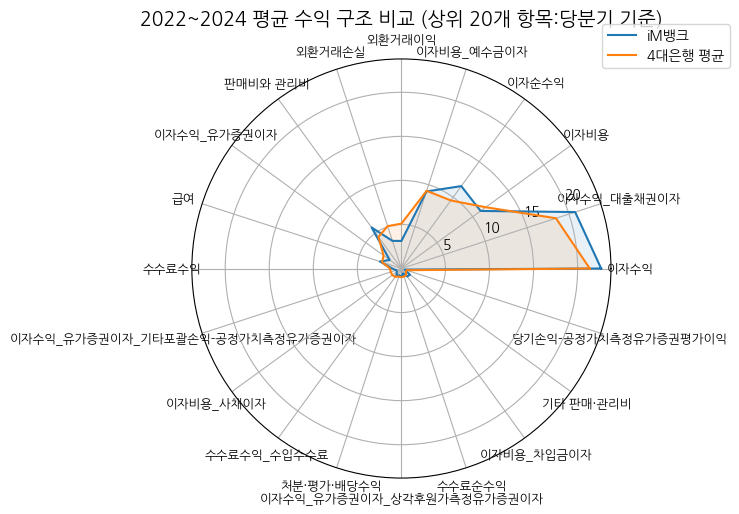

In [84]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 파일 불러오기
xls = pd.ExcelFile("Data/최종 프로젝트/FISIS_MultipleTable_200003-202503.xlsx")
df = xls.parse("복수 통계표 조회결과")

# 2017년 이후 분기 컬럼만 추출
value_cols = [col for col in df.columns if "년" in col and int(col[:4]) >= 2022]

# ':당분기'로 끝나는 항목만 필터링
df = df[df["항목"].str.endswith(":당분기")].copy()

# 평균값 계산
df["값"] = df[value_cols].mean(axis=1)

# 피벗: 회사 x 항목
pivot = df.pivot_table(index="회사명", columns="항목", values="값", aggfunc="sum").fillna(0)

# 전체 기준 상위 20개 항목 선택
top20_cols = pivot.sum().sort_values(ascending=False).head(20).index.tolist()
pivot_top20 = pivot[top20_cols]

# 비중 계산
pivot_percent = pivot_top20.div(pivot_top20.sum(axis=1), axis=0) * 100

# 대상 설정
bank_im = "아이엠뱅크"
bank_4 = ["국민은행", "신한은행", "우리은행", "주식회사 하나은행"]

# iM뱅크 + 4대은행 평균 비교용 DF
compare_df = pd.DataFrame()
compare_df["iM뱅크"] = pivot_percent.loc[bank_im]
compare_df["4대은행 평균"] = pivot_percent.loc[bank_4].mean()
compare_df = compare_df.T  # 행: iM뱅크, 4대은행 / 열: 항목

# 레이블: 항목명 그대로
# labels = compare_df.columns.tolist()
# 레이블: ':당분기' 제거하여 간결하게
labels = [col.replace(":당분기", "") for col in compare_df.columns.tolist()]

# 레이더 차트 시각화
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for bank in compare_df.index:
    values = compare_df.loc[bank].tolist()
    values += values[:1]
    ax.plot(angles, values, label=bank)
    ax.fill(angles, values, alpha=0.1)

ax.set_title("2022~2024 평균 수익 구조 비교 (상위 20개 항목:당분기 기준)", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


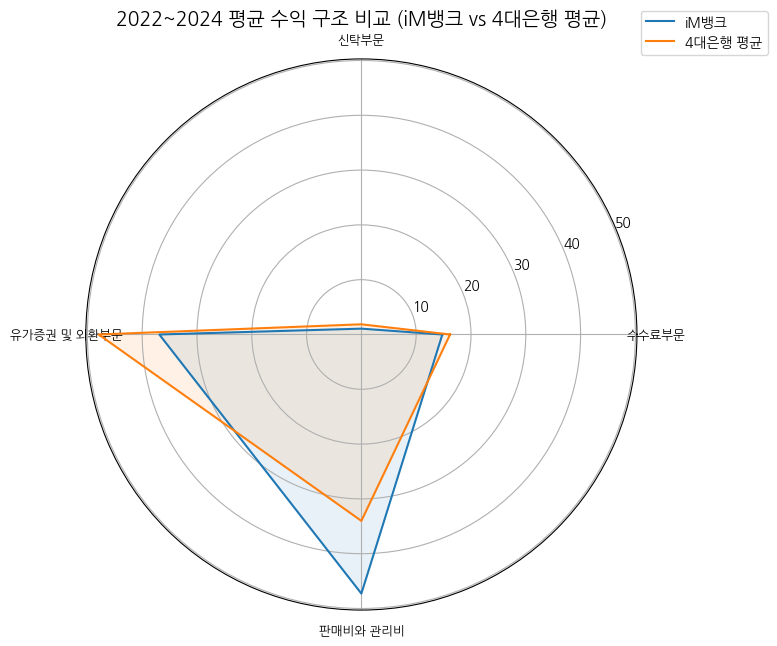

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 파일 불러오기
xls = pd.ExcelFile("Data/최종 프로젝트/FISIS_MultipleTable_200003-202503.xlsx")
df = xls.parse("복수 통계표 조회결과")

df = df[df["보고서명"] != "부문별 손익(이자부문)"]

# 1. ':당분기'로 끝나는 항목만 필터링
df = df[df["항목"].str.endswith(":당분기")].copy()

# 2. 2017년 이후 분기 컬럼만 추출
value_cols = [col for col in df.columns if "년" in col and int(col[:4]) >= 2022]

# 3. 평균값 계산
df["값"] = df[value_cols].mean(axis=1)

# 4. 피벗: 회사 x 보고서명
pivot = df.pivot_table(index="회사명", columns="보고서명", values="값", aggfunc="sum").fillna(0)

# 5. 비중 계산
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 6. iM뱅크 vs 4대은행 평균 계산
bank_im = "아이엠뱅크"
bank_4 = ["국민은행", "신한은행", "우리은행", "주식회사 하나은행"]

compare_df = pd.DataFrame()
compare_df["iM뱅크"] = pivot_percent.loc[bank_im]
compare_df["4대은행 평균"] = pivot_percent.loc[bank_4].mean()
compare_df = compare_df.T  # 행: ['iM뱅크', '4대은행 평균'], 열: 보고서명

# 7. 레이블 처리: 보고서명에서 괄호 안만 추출
labels_raw = compare_df.columns.tolist()
labels = [lbl if pd.isna(lbl) else lbl.split("(")[-1].replace(")", "") for lbl in labels_raw]

# 8. 레이더 차트 시각화
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for bank in compare_df.index:
    values = compare_df.loc[bank].tolist()
    values += values[:1]
    ax.plot(angles, values, label=bank)
    ax.fill(angles, values, alpha=0.1)

ax.set_title("2022~2024 평균 수익 구조 비교 (iM뱅크 vs 4대은행 평균)", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.1))
plt.tight_layout()
plt.show()


In [5]:
df["보고서명"].unique()

array(['부문별 손익(이자부문)', '부문별 손익(수수료부문)', '부문별 손익(신탁부문)',
       '부문별 손익(유가증권 및 외환부문)', '부문별 손익(판매비와 관리비)'], dtype=object)

In [10]:
df[(df["항목"].str.contains("당분기")) & (df["보고서명"].str.contains("유가증권"))]["항목"].unique()

array(['유가증권 손익:당분기', '처분·평가·배당수익:당분기', '당기손익-공정가치측정유가증권매매이익:당분기',
       '당기손익-공정가치측정유가증권평가이익:당분기', '당기손익-공정가치측정유가증권배당수익:당분기',
       '기타포괄손익-공정가치측정유가증권매매이익:당분기', '기타포괄손익-공정가치측정채권 대손충당금 환입:당분기',
       '기타포괄손익-공정가치측정유가증권배당수익:당분기', '상각후원가측정유가증권매매이익:당분기',
       '상각후원가측정유가증권 대손충당금 환입:당분기', '처분·평가비용:당분기',
       '당기손익-공정가치측정유가증권매매손실:당분기', '당기손익-공정가치측정유가증권평가손실:당분기',
       '기타포괄손익-공정가치측정유가증권매매손실:당분기', '기타포괄손익-공정가치측정유가증권 대손충당금 전입액:당분기',
       '상각후원가측정유가증권매매손실:당분기', '상각후원가측정유가증권 대손충당금 전입액:당분기', '외환관련 손익:당분기',
       '외환거래이익:당분기', '외환거래손실:당분기'], dtype=object)

In [18]:
df2 = df.groupby(["회사명", "항목"], as_index=False).sum()
df2[df2["항목"] == "수수료수익:당분기"]

,회사명,항목,회사코드,보고서명,보고서코드,factor_id,단위,2025년03월,2024년12월,2024년09월,...,2010년06월,2010년03월,2009년12월,2009년09월,2009년06월,2009년03월,2008년12월,2008년09월,2008년06월,2008년03월
51,국민은행,수수료수익:당분기,10927,부문별 손익(수수료부문),SDSA030V,F000001907,백만원,321914,336761,325263,...,332072.0,317429.0,330759.0,341670.0,337164.0,314913.0,308097.0,340835.0,392865.0,370618.0
171,신한은행,수수료수익:당분기,11625,부문별 손익(수수료부문),SDSA030V,F000001907,백만원,286683,259150,285472,...,250476.0,238165.0,253065.0,238829.0,251357.0,196989.0,220694.0,242268.0,266282.0,260566.0
291,아이엠뱅크,수수료수익:당분기,10016,부문별 손익(수수료부문),SDSA030V,F000001907,백만원,31880,29795,32547,...,31255.0,31144.0,32083.0,31992.0,31708.0,30105.0,33317.0,34178.0,36818.0,34876.0
411,우리은행,수수료수익:당분기,10001,부문별 손익(수수료부문),SDSA030V,F000001907,백만원,222019,226118,246943,...,221097.0,208354.0,224235.0,224629.0,236441.0,213942.0,242987.0,246425.0,276813.0,241516.0
531,주식회사 하나은행,수수료수익:당분기,13909,부문별 손익(수수료부문),SDSA030V,F000001907,백만원,261728,246810,252859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
651,한국스탠다드차타드은행,수수료수익:당분기,10002,부문별 손익(수수료부문),SDSA030V,F000001907,백만원,104161,80357,69419,...,89245.0,70210.0,75628.0,85032.0,73898.0,76110.0,64011.0,76161.0,79768.0,70746.0
771,한국씨티은행,수수료수익:당분기,10006,부문별 손익(수수료부문),SDSA030V,F000001907,백만원,29956,32182,30003,...,60087.0,52882.0,52049.0,48909.0,53021.0,45513.0,45715.0,56916.0,67094.0,67081.0


In [ ]:
#수수료
df[(df["보고서명"] == "부문별 손익(수수료부문)") & (df["항목"] == "수수료수익:당분기")]

#외환
df[(df["보고서명"] == "부문별 손익(유가증권 및 외환부문)") & (df["항목"] == "외환관련 손익:당분기")]

# 신탁
df[(df["보고서명"] == "부문별 손익(신탁부문)") & (df["항목"] == "신탁(은행계정) 관련 손익:당분기")]

#유가증권
df[(df["보고서명"] == "부문별 손익(유가증권 및 외환부문)") & (df["항목"] == "유가증권 손익:당분기")]

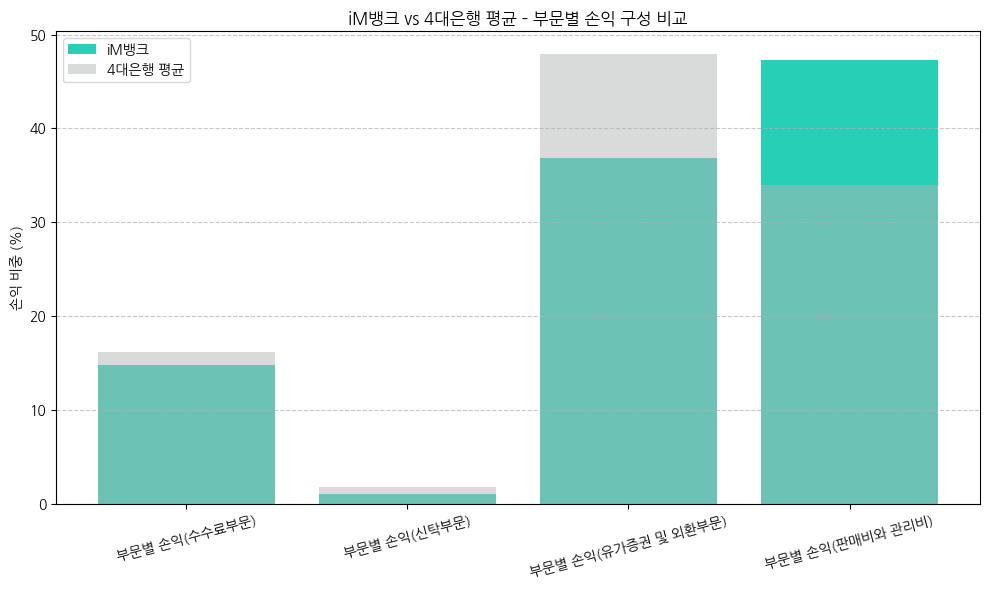

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 정의
compare_df = pd.DataFrame({
    "보고서명": [
        "부문별 손익(수수료부문)", 
        "부문별 손익(신탁부문)", 
        "부문별 손익(유가증권 및 외환부문)", 
        "부문별 손익(판매비와 관리비)"
    ],
    "iM뱅크": [14.776067, 1.067248, 36.875401, 47.281283],
    "4대은행 평균": [16.185989, 1.858542, 47.941675, 34.013794]
})

# long 형태로 변환
df_melt = compare_df.melt(id_vars="보고서명", var_name="은행", value_name="손익비중(%)")

# 시각화
plt.figure(figsize=(10, 6))
colors = {"iM뱅크": "#00c7a9", "4대은행 평균": "#b4b6b7"}

for bank in df_melt["은행"].unique():
    subset = df_melt[df_melt["은행"] == bank]
    plt.bar(subset["보고서명"], subset["손익비중(%)"], label=bank, alpha=0.85 if bank == "iM뱅크" else 0.5, color=colors[bank])

plt.title("iM뱅크 vs 4대은행 평균 – 부문별 손익 구성 비교")
plt.xticks(rotation=15)
plt.ylabel("손익 비중 (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
pivot

보고서명,부문별 손익(수수료부문),부문별 손익(신탁부문),부문별 손익(유가증권 및 외환부문),부문별 손익(이자부문),부문별 손익(판매비와 관리비)
회사명,,,,,
국민은행,1.092765e+06,108529.076923,3.657902e+06,1.743962e+07,2.100553e+06
신한은행,8.324921e+05,98034.153846,2.170992e+06,1.538422e+07,1.675983e+06
아이엠뱅크,1.136143e+05,8206.153846,2.835378e+05,2.547970e+06,3.635494e+05
우리은행,7.430020e+05,82916.000000,1.128505e+06,1.435932e+07,1.738003e+06
주식회사 하나은행,7.566598e+05,103819.230769,4.160358e+06,1.545435e+07,1.561586e+06
한국스탠다드차타드은행,2.465485e+05,11076.000000,1.146426e+06,2.489791e+06,4.459677e+05
한국씨티은행,1.145515e+05,12704.153846,9.935872e+05,1.229416e+06,3.160482e+05
